In [242]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
from astropy import constants as const

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
Z=1 #charge number
qe=np.pi**2/137
frac1=32*np.pi/3 # unitless
frac2= (qe**6)/(const.m_e**2 * const.c**4).to(u.erg**2) # units 1/erg^2
frac3= ((2*np.pi*const.m_e*const.c**2).to(u.erg)/(3*const.k_B*1e8*u.K))**(1/2) # unitless

conversion_factor = 0.197*1e-15 * (u.GeV * u.m)
conversion_factor_cm = conversion_factor.to(u.GeV * u.cm)
prefactors = (((frac1*frac2*frac3).to(1/u.GeV**2)) * conversion_factor_cm**3).to(u.erg*u.cm**3)
prefactors # WANT 10^-42

#use actual number in textbook

<Quantity 2.44892559e-42 cm3 erg>

In [244]:
# temporary numbers
T=1e-6*u.GeV
V=(4/3)*np.pi*u.Mpc**3
rho_b = 0.1*u.Msun*1e14/V
n_b = (rho_b/const.m_p).to(1/u.cm**3)
freq=1e18*u.Hz

In [245]:


#pref=(prefactors*(conversion_factor**3 * u.m**3 / u.GeV**(-3))).to(u.cm**3*u.erg**(3/2))
#print(pref)
Z=1
T=(1e-6*u.GeV).to(u.K, equivalencies=u.temperature_energy())
T8=T/(1e8*u.K)
V=(4/3)*np.pi*u.Mpc**3
rho_b = 0.1*u.Msun*1e14/V
n_b = (rho_b/const.m_p).to(1/u.cm**3)
freq=1e18*u.Hz

Eff2=(prefactors*Z**2*n_b**2)/(T8)**(1/2)*np.exp(-const.h*freq/(const.k_B*T))
print(Eff2)
C=(prefactors*Z**2*n_b**2)/(T8)**(1/2)


1.0727539794091677e-51 erg / cm3


In [246]:
#C=(prefactors*(T)**(-1/2)*n_b**2*(conversion_factor**3 * u.m**3 / u.GeV**(-3))).to(u.GeV/u.cm**3)
Eff_int=(C*T*const.k_B/const.h).to(u.GeV/(u.s*u.cm**3))
Eff_int

<Quantity 1.01237582e-29 GeV / (cm3 s)>

In [247]:
(V*Eff_int).to(u.GeV/u.s)

<Quantity 1.24589663e+45 GeV / s>

In [279]:
from load_mcxc_data import load_clusters
cluster=load_clusters(1)[0]

In [280]:
cluster.agn_heating_rate()

<Quantity 2.76360585e+52 GeV / s>

In [281]:
Z=1

V=cluster.volume
T=(cluster.baryon_temp).to(u.K, equivalencies=u.temperature_energy())
T8=T/(1e8*u.K)
n_b=(cluster.rho_b/cluster.m_b).to(u.cm**(-3))

C=(prefactors*Z**2*n_b**2)/(T8)**(1/2)

Eff_int=(C*T*const.k_B/const.h).to(u.GeV/(u.s*u.cm**3))
(V*Eff_int).to(u.erg/u.s)

#decreasing prefactors would make this smaller

<Quantity 5.25496691e+42 erg / s>

In [282]:
cluster.radiative_cooling_rate()

<Quantity 1.45916132e+43 erg / s>

In [283]:
cluster.sigma0()

<Quantity [1.42187748e-25, 1.42188703e-25, 1.42189852e-25, 1.42191237e-25,
           1.42192905e-25, 1.42194914e-25, 1.42197335e-25, 1.42200250e-25,
           1.42203761e-25, 1.42207990e-25, 1.42213085e-25, 1.42219222e-25,
           1.42226613e-25, 1.42235517e-25, 1.42246243e-25, 1.42259163e-25,
           1.42274727e-25, 1.42293475e-25, 1.42316061e-25, 1.42343270e-25,
           1.42376049e-25, 1.42415541e-25, 1.42463123e-25, 1.42520454e-25,
           1.42589538e-25, 1.42672791e-25, 1.42773128e-25, 1.42894069e-25,
           1.43039868e-25, 1.43215663e-25, 1.43427672e-25, 1.43683417e-25,
           1.43992017e-25, 1.44364532e-25, 1.44814398e-25, 1.45357968e-25,
           1.46015184e-25, 1.46810422e-25, 1.47773572e-25, 1.48941410e-25,
           1.50359369e-25, 1.52083863e-25, 1.54185347e-25, 1.56752416e-25,
           1.59897398e-25, 1.63764063e-25, 1.68538513e-25, 1.74464815e-25,
           1.81868013e-25, 1.91188849e-25, 2.03037685e-25, 2.18281113e-25,
           2.38186582e-25

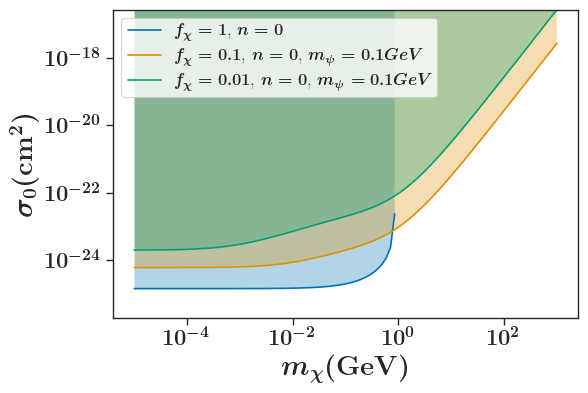

In [290]:
cluster.plot_sigma0_vs_m_chi(f_chi=[1, 0.1, 0.01], region=True)

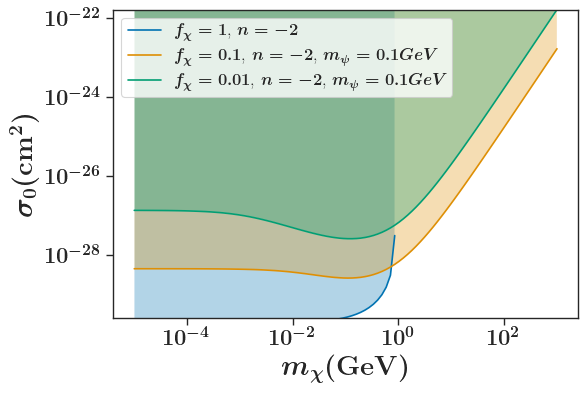

In [293]:
cluster.plot_sigma0_vs_m_chi(f_chi=[1, 0.1, 0.01],n=[-2],  region=True)

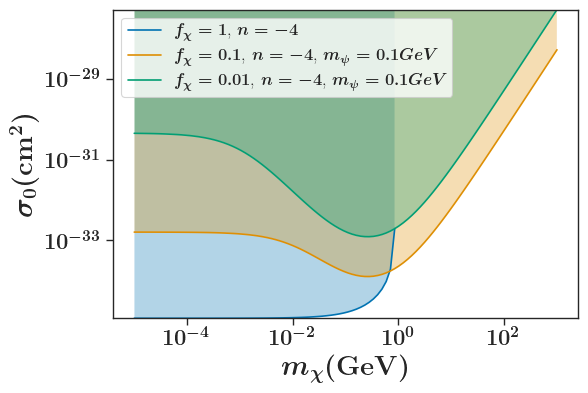

In [296]:
cluster.plot_sigma0_vs_m_chi(f_chi=[1, 0.1, 0.01],n=[-4],  region=True)